In [1]:
import torch
from models.full_models.mnist_base_classifier import MnistBaseClassifier
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [2]:
weights = torch.load('saved_models/mnist_base_classifier/best_weights.pth', weights_only=True)
model = MnistBaseClassifier()
model.load_state_dict(weights)

<All keys matched successfully>

In [3]:
testset = datasets.MNIST(root='./data', train=False, download=False, transform = transforms.ToTensor())
testloader = DataLoader(testset, batch_size=32, shuffle=True)
images, labels = next(iter(testloader))

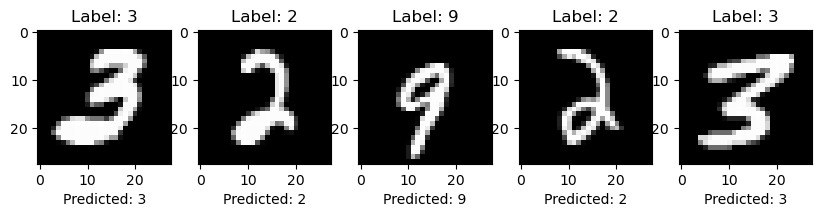

In [4]:
fig, axes = plt.subplots(1, 5, figsize=(10, 4))
for idx in range(5):
    img_tensor = images[idx]
    actual_label = labels[idx].item()

    img_np = img_tensor.squeeze().numpy()
    model.eval()
    with torch.no_grad():
        pred = model(img_tensor.unsqueeze(0))
        pred = torch.argmax(pred, dim=1).item()

    axes[idx].imshow(img_np, cmap='gray')
    axes[idx].set_title(f"Label: {actual_label}")
    axes[idx].set_xlabel(f"Predicted: {pred}")
plt.show()